<left>
    <img src="https://kpi.ua/files/images/kpi.png" width="300" alt="kpi logo"  />
</left>

# **Курсова робота** 
# **на тему:**
# ***Моделювання лісових пожеж***
# **Кононенко Павло КМ-81**
# **Керівник: Норкін Б. В.**

# **Зміст**

* **Вступ**
* **Постановка задачі**
* **Теоретичні відомості**
    * Алгоритм методу
* **Програма та її функції**
    * Конфігурації
* **Висновки**
* **Джерела**

# **Вступ**

Кліти́нний автома́т (КА) — дискретна математична модель, яка описується набором клітин, що утворюють решітку з заданими правилами переходу, що визначають стан клітини за теперішнім станом самої клітинки та тих її сусідів, що знаходяться від неї на певній відстані.

В даній роботі, мова піде про "*застосування клітинних автоматів для моделювання лісових пожеж*". Для оцінки роботи моделі будемо генерувати різні множини клітин різних видів (дерево, кущ, пуста клітина, вода, вогонь тощо) та оціними роботу і правильність моделі.

# **Постановка задачі**

Створити модель для моделювання лісових пожеж.

# **Теоретичні відомості**

Визначення клітинного автомату було дано у вступі, але воно не єдине. Поняття клітинних автоматів доволі обширне, тому можна знайти доволі багато різних визначень. 

Найпоширенішими є:

* математичний об'єкт із дискретним простором та часом;
* регулярна структура двійкових скінченних автоматів з однаковими правилами переходів, що виражені у вигляді булевих функцій від станів сусідніх автоматів;
* математична ідеалізація фізичної системи, в якій час та простір дискретні, а фізичні величини приймають скінченну множину значень.
*візуальна модель динамічної системи з дискретним часом та простором.

Класичні КА в загальному випадку відповідають наступним критеріям:

* зміна значень всіх клітинок відбуваються одночасно після обчислення нового стану кожної клітинки решітки. Інакше порядок перебору клітин решітки при проходженні ітеративного процесу суттєво впливав би на результат;
* решітка однорідна. Неможливо відрізнити жодні два місця на решітці по ландшафту. Однак на практиці решітка виявляється кінцевою множиною клітин (адже неможливо виділити необмежений об'єм даних). В результаті можуть мати місце крайові ефекти: клітини, що стоять на межах решітки будуть відрізнятися за кількістю сусідів. Щоб уникнути цього можна ввести періодичні крайові умови;
* взаємодії локальні. Лише околишні клітинки (як правило, сусідні) здатні вплинути на дану клітинку;
* множина станів клітинки кінцева. Ця умова потрібна, щоб для отримання нового значення стану клітини треба було виконати кінцеву кількість операцій (але це не заважає використовувати клітини для зберігання чисел із плаваючою комою для розв'язку прикладних задач).

Якщо з будь-якого початкового стану можна привести клітинного автомат в будь-яку задану конфігурацію шляхом варіювання значення загального вхідного параметра, такий КА називають повним.

**Стани елементів**

У кожний момент часу кожен елемент КА приймає один стан зі скінченного набору станів. У залежності від цих станів в наступний момент часу набір елементів може прийняти новий стан. Якщо для елементів КА множини можливих станів відрізняються, такий клітинний автомат називається полігенним. Але на практиці використовуються комірки з еквівалентною множинам можливих станів алгебраїчною структурою — лінійні КА.

В даній роботі алгоритм буде вдосконалено.

# Алгоритм методу

Зазвичай, достатньо описати набір правил щоб описати, як еволюціонуватимуть клітини. 

*Об'єкти*:

Вода, Дерева, Кущі, Грунт, Вогонь

*Набір правил для об'єктів*:

* Вода: якщо клітина є водою, то вона не загориться, навіть якщо поруч вогонь.

* Дерево і кущ: мають однакові правила, але різні ймовірності загоряння. Якщо поруч з цими клітинами є вогонь, вони загоряться. Якщо поруч є вогонь і вода, то ймовірність загоряння зменшується. Також, вони можуть загорітися самі по собі з певною ймовірністю (наприклад, через сонце або удар блискавки).

* Грунт (пуста клітина): жодних правил.

Таким чином, можна постійно розширяти список об'єктів, наприклад, додати різні види дерев з різними ймовірностями загоряння, різні грунти, напрями вітру тощо.



# **Програма та її функції**

# Конфігурації

Розширення в **Google Colab**

In [4]:
%%capture
! pip install matplotlib
! sudo apt-get install texlive-latex-recommended 
! sudo apt install texlive-latex-extra
! sudo apt install dvipng
! sudo apt install cm-super

Бібліотеки для Python:

In [163]:
import numpy as np                # for simple/fast/efficient array operations
import pandas as pd               # for table printing
import matplotlib.pyplot as plt   # for visualisation
from matplotlib import animation, colors
from matplotlib.patches import Wedge
from matplotlib import rc
rc('animation', html='jshtml')

#np.random.seed(100)   # random seed
plt.rcParams.update({
    "text.usetex": True,
    "text.latex.preamble": [r'\usepackage{amsmath}'],
    "font.size": 20,
    "font.family": "serif"})   # configure Latex in matplotlib 

Програмні константи:

In [162]:
# For finding neighbors
neighborhood = ((-1,-1), (-1,0), (-1,1), (0,-1), (0, 1), (1,-1), (1,0), (1,1))

# obj -> idx
EMPTY, TREE, BUSH, WATER, FIRE = 0, 1, 2, 3, 4

# RGB Colors for objs
colors_list = [(0.3, 0.1, 0.05), (0, 0.5, 0),  (0, 0.75, 0), (0.05, 0.4, 0.9), (1, 0, 0), (0.95, 0.46, 0.1),]
cmap = colors.ListedColormap(colors_list)
bounds = [0, 1, 2, 3, 4, 5]

# colors -> bins in bounds; data within a bin 
norm = colors.BoundaryNorm(bounds, cmap.N)

# Starting fire pixels
fire_pxls_idxs = [(11, 2), (122, 187)]

# % of forest with trees and bushes
tree_fraction = 0.24
bush_fraction = 0.06

# p -> probability of a tree growing;
# f1 -> probability of ignition tree;
# f2 -> probability of ignition bush;
p, f1, f2 = 0.0, 0.01, 0.023
water_coef = 2

# Forest size
nx, ny = 200, 200

# For gif and plt configuration
interval = 100
off_axis = True

with_water_bool = True

Функції для моделювання горіння

In [164]:
def time_step(X):
    X1 = np.zeros((ny, nx))

    for x in range(1,nx-1):
         for y in range(1,ny-1):
            if X[y,x] == EMPTY and np.random.random() <= p:
                 X1[y,x] = TREE
            
            if X[y,x] == WATER:
                X1[y,x] = WATER
                
            if X[y,x] in [TREE, BUSH]:
                 X1[y,x] = X[y, x]
 
                 for dx,dy in neighborhood:
                     if X[y+dy,x+dx] == FIRE:
                         X1[y,x] = FIRE
                         break
                     elif X[y+dy,x+dx] == WATER:
                         if water_coef * np.random.random() <= p:
                             X1[y, x] = FIRE
                             break
                         else:
                             X1[y, x] = X[y, x]
                             break
                 else:
                     if np.random.random() <= (f1 if X[y, i] == TREE else f2):
                         X1[y,x] = FIRE
    return X1

Побудова поля:

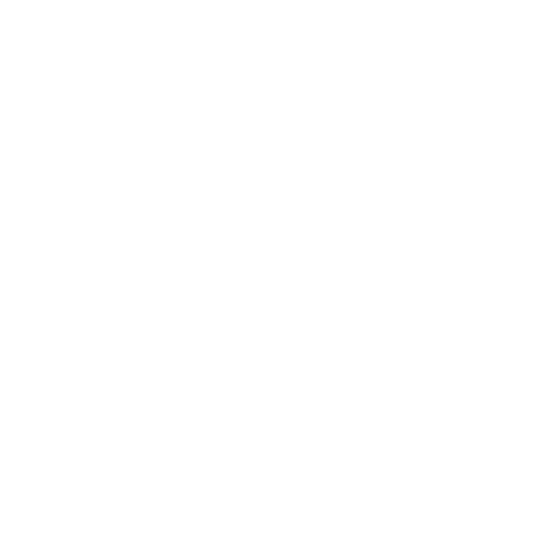

In [165]:
# Empty arr
X = np.zeros((ny, nx))

X[1: ny - 1, 1: nx - 1] = np.random.choice(np.arange(0, 3), size=(ny-2, nx-2), p=[0.7, tree_fraction, bush_fraction])

# Add water
if with_water_bool:
    X[np.random.randint(70, 125, 1800).astype(int), np.random.randint(30, 85, 1800).astype(int)] = WATER

# Start fire
for idx, idxs in enumerate(fire_pxls_idxs):
    X[idxs[0], idxs[1]] = FIRE
    for dx, dy in neighborhood:
        if X[idxs[0]+dy,idxs[1]+dx] != FIRE:
            X[idxs[0]+dy, idxs[1]+dx] = FIRE

# Init plotting figure
fig, ax = plt.subplots(figsize=(10, 10))

if off_axis:
    ax.set_axis_off()

def animate(i, X):
    im = ax.imshow(X, cmap=cmap, norm=norm, interpolation='nearest', animated=True)
    X = time_step(X)
    return im, X
imgs = []
for i in range(interval):
    im, X = animate(i, X)
    imgs.append([im])

#anim = animation.FuncAnimation(fig, animate, frames=100, blit=False, repeat=True)
anim = animation.ArtistAnimation(fig, imgs, interval=20, blit=True)
#anim.save("animation.mp4")

In [166]:
anim

# **Висновки**

В курсовій роботі було розглянуто моделювання пожеж в лісах за допомогою клітинних автоматів. Цей метод є досить примітивним, але дає змогу швидко створити прототип моделі та зрозуміти основні характеристики. Так, як ця модель є простою і примітивною, її можна легко вдосконалювати. Наприклад, на відміну віж класичних клітинних автоматів, де стан об'єкта залежить лише від сусідів, в створеній моделі горіння залежить ще й від ймовірності загорання того чи іншого дерева, матеріалу тощо. Таким чином, можна підбирати коефіцієнти і будувати більш-менш точні прогнози та моделі.

# **Джерела**

1. https://www.wiki.uk-ua.nina.az/%D0%9A%D0%BB%D1%96%D1%82%D0%B8%D0%BD%D0%BD%D0%B8%D0%B9_%D0%B0%D0%B2%D1%82%D0%BE%D0%BC%D0%B0%D1%82.html
2. Минский М. Вычисления и автоматы. М.: Мир, 1971.
3. Федотьев А. Клеточный автомат -http://rain.ifmo.ru/~fedotiev/.
4. "Modeling Fire Growth (FARSITE Technical Documentation)." http://fire.org/downloads/farsite/WebHelp/technicalreferences/t.